In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

In [2]:
def create_dir_list(img_directory):
    count = 0 
    list_names = []
    for filenames in os.listdir(img_directory):
        file_name = str(filenames)
        if 'jpg' in file_name:
            list_names.append(img_directory + "/" +  file_name)
            count += 1
    return list_names, count

In [3]:
def show_images(img_directory):
    list_names = create_dir_list(img_directory)
    for i in list_names:
        plt.imshow(cv2.imread(i))
        plt.show()

In [4]:
#the label key for the emotions
def key(do_print=False):
    key_dict = {"angry": "red", "" : "red", "neutral": "blue", 'nuetral': "blue", "surprise": "purple", "suprrise" : "purple", "fear" : "black", "sad" : "orange", "happy": "cyan", "disgust" : "gray", 'nappy': 'cyan'}
    return key_dict
def linear_key():
    key_dict = {"angry": 'r.', "" : 'r.', "neutral": 'b.', 'nuetral': 'b.', "surprise": "m.", "suprrise" : "m.", "fear" : "k.", "sad" : "b.", "happy": "c.", "disgust" : "g.", 'nappy': 'c.'}
    return key_dict


In [5]:
def create_plot(labels, img_directory, gaussian=True):
    if(gaussian == True):
        list_names, num = create_dir_list(img_directory)
        x_list = []
        y_list = []
        count = 0
        for i in list_names:
            if(i[19] == '-'):
                x = i[19:24]
                if(i[27] == '-'):
                    y = i[27:32]
                else:
                    y = i[27:31]
            else:
                x = i[19:23]
                if(i[26] == '-'):
                    y = i[26:31]
                else:
                    y = i[26:30]

            x = float(x)
            y = float(y)
            x_list.append(x)
            y_list.append(y)
        count = 0 
        color_dict = key()
        for i in range(len(x_list)):
            plt.scatter(x_list[i], y_list[i], c=color_dict[labels[count]])
            count += 1
        plt.show()
    else:
        color_dict = linear_key()
        list_names, num = create_dir_list(img_directory)
        theta_list = []
        count = 0
        for i in list_names:
            x = i[30:34]
            x = round(float(x) * np.pi/180, 2)
            theta_list.append(x)
        plt.axes(projection = 'polar')
        for i in range(len(theta_list)):
            plt.polar(theta_list[i], 0.9, color_dict[labels[i]])
        plt.show()


# Mapping of latent dimension of 'Linear' GANmut model

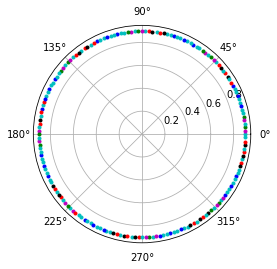

In [87]:
img_directory = '../edited_images_linear'
create_plot(list_test, img_directory, gaussian=False)

In [6]:
img_directory = "../edited_images_linear"
list_test = []
list_names, count = create_dir_list(img_directory)
curr = 1
for filenames in os.listdir(img_directory):
    if(curr <= 180):
        print(str(curr) + "/" + str(count))
    if('.jpg' in filenames):
        img = cv2.imread(img_directory + "/" + filenames)
        plt.imshow(img)
        plt.show()
        label = str(input("Enter emotion: "))
        list_test.append(label)
        curr = curr + 1
print(list_test) 

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../edited_images_linear'

# Mapping of latent dimension of 'Gaussian' GANmut model

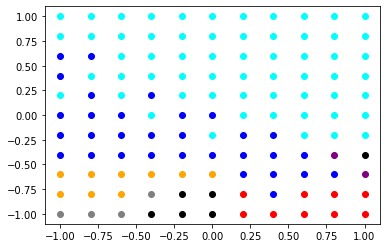

In [214]:
create_plot(list_test, img_directory)

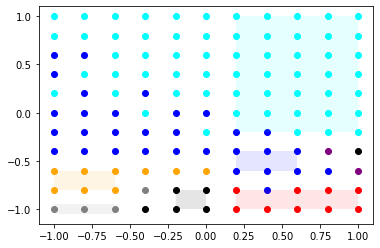

In [239]:
import matplotlib.patches as mpatches

labels = list_test

list_names, num = create_dir_list(img_directory)
x_list = []
y_list = []
count = 0
for i in list_names:
    if(i[19] == '-'):
        x = i[19:24]
        if(i[27] == '-'):
            y = i[27:32]
        else:
            y = i[27:31]
    else:
        x = i[19:23]
        if(i[26] == '-'):

            y = i[26:31]
        else:
            y = i[26:30]
                
    x = float(x)
    y = float(y)
    x_list.append(x)
    y_list.append(y)
count = 0 
color_dict = key()
for i in range(len(x_list)):
    plt.scatter(x_list[i], y_list[i], c=color_dict[labels[count]])
    count += 1


left, bottom, width, height = (0.2, -0.2, 0.8, 1.2)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="cyan")
plt.gca().add_patch(rect)

left, bottom, width, height = (0.2, -1, 0.8, 0.2)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
plt.gca().add_patch(rect)

left, bottom, width, height = (-0.2, -1, 0.2, 0.2)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="black")
plt.gca().add_patch(rect)

left, bottom, width, height = (-1, -1.05, 0.4, 0.1)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="gray")
plt.gca().add_patch(rect)

left, bottom, width, height = (0.2, -0.6, 0.4, 0.2)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="blue")
plt.gca().add_patch(rect)


left, bottom, width, height = (-1, -0.8, 0.4, 0.2)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="orange")
plt.gca().add_patch(rect)



plt.show()

RuntimeError: train.csv not found in data\fer2013 or corrupted. You can download it from https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge